In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

In [2]:
folder = "10nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = 10
reading = Txt_Reading(folder, f_max)

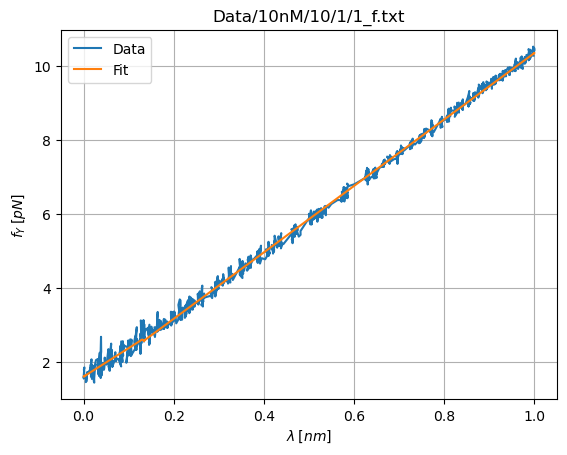

In [3]:
file = reading.readTxt(number=1, N=1, ty='f', graph=True)

In [4]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,3.1415,2.5592,14.607945,55.801388,1.77197,0.132893,7.724349,1.610366,8.982837,1.379488


In [5]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [6]:
reading.f_rupture, reading.f_rupture_next

([3.1415], [2.5592])

The break point λ_0 [0.0] could be smaller/higher than expected
or the rupture force [1.9967] smaller/higher than expected
Reshape of 20 performed


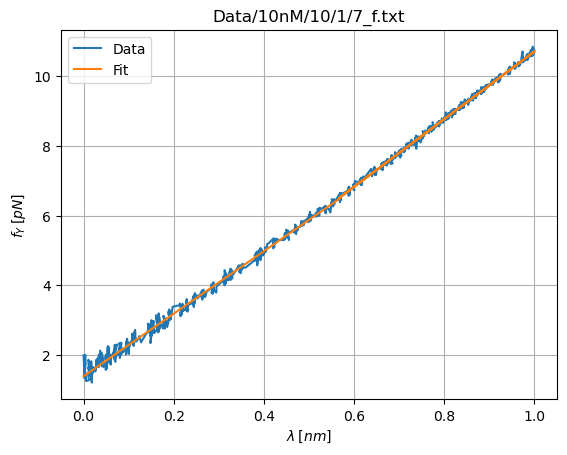

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,6.5594,6.6258,2.749608,7.583078,1.00928,0.567021,8.971195,1.394221,9.701057,1.00887


In [7]:
file = reading.readTxt(number=1, N=7, ty='f', graph=True)
reading.params_df

In [8]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

In [9]:
molecules, all_molecules_f, all_molecules_u = reading.sequential_analysis()

  0%|          | 0/4 [00:00<?, ?it/s]

Not saving file Data/10nM/10/1/7_f.txt
Not saving file Data/10nM/10/1/9_f.txt
Not saving file Data/10nM/10/1/13_f.txt
Not saving file Data/10nM/10/1/14_f.txt
Not saving file Data/10nM/10/1/16_f.txt
Not saving file Data/10nM/10/1/17_f.txt
Not saving file Data/10nM/10/1/30_f.txt
Not saving file Data/10nM/10/1/4_u.txt
Not saving file Data/10nM/10/1/15_u.txt
Not saving file Data/10nM/10/1/26_u.txt
Not saving file Data/10nM/10/1/29_u.txt
Not saving file Data/10nM/10/7/4_f.txt
Not saving file Data/10nM/10/7/20_f.txt
Not saving file Data/10nM/10/7/21_f.txt
Not saving file Data/10nM/10/7/25_f.txt
Not saving file Data/10nM/10/7/27_f.txt
Not saving file Data/10nM/10/7/39_f.txt
Not saving file Data/10nM/10/7/64_f.txt
Not saving file Data/10nM/10/7/72_f.txt
Not saving file Data/10nM/10/7/11_u.txt
Not saving file Data/10nM/10/7/23_u.txt
Not saving file Data/10nM/10/7/51_u.txt
Not saving file Data/10nM/10/7/52_u.txt
Not saving file Data/10nM/10/12/3_f.txt
Not saving file Data/10nM/10/12/7_f.txt
Not 

In [10]:
λ = reading.file[1:, -1]
force_Y = np.abs(reading.file[1:, 2])

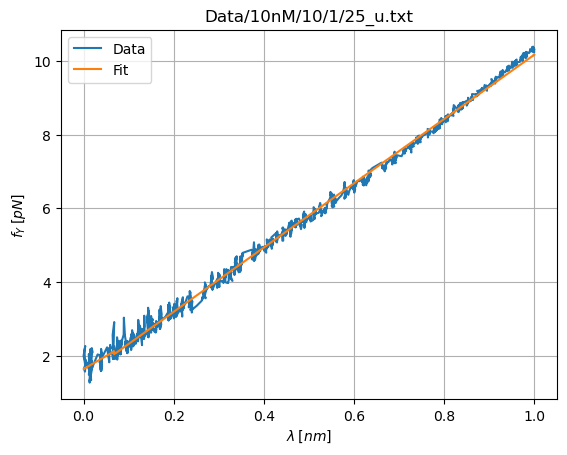

In [11]:
file = reading.readTxt(number=1, N=25, ty='u', graph=True)

In [12]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post
0,2.9225,1.927,27.075179,107.854798,0.14112,0.067973,7.060215,1.651377,8.702596,1.461563


In [13]:
reading.k_eff

0.03794631498474971

In [14]:
reading.res_fold.head()

,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0
0,1.0,3.1415,2.5592,14.607945,55.801388,1.77197
1,1.0,2.6288,1.8374,14.105746,59.948790,5.10254
2,1.0,3.7255,3.2212,12.616548,43.973768,8.91699
3,1.0,3.4667,2.9424,13.049667,47.218937,13.14941
4,1.0,2.8130,3.0287,6.087660,24.812064,17.43310


In [15]:
reading.res_unfold.head()

,Molecule,f,f_next,x_ssDNA,N_nucleotides,t_0
0,1.0,5.7448,5.2370,12.030674,34.740219,-1.22559
1,1.0,2.5243,2.0199,14.655128,63.911864,2.24316
2,1.0,3.1913,3.2162,1.437594,5.442942,5.66113
3,1.0,3.1316,3.2610,3.621036,13.856946,13.95312
4,1.0,4.2764,3.7289,13.357615,43.553846,18.50342


In [16]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [17]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


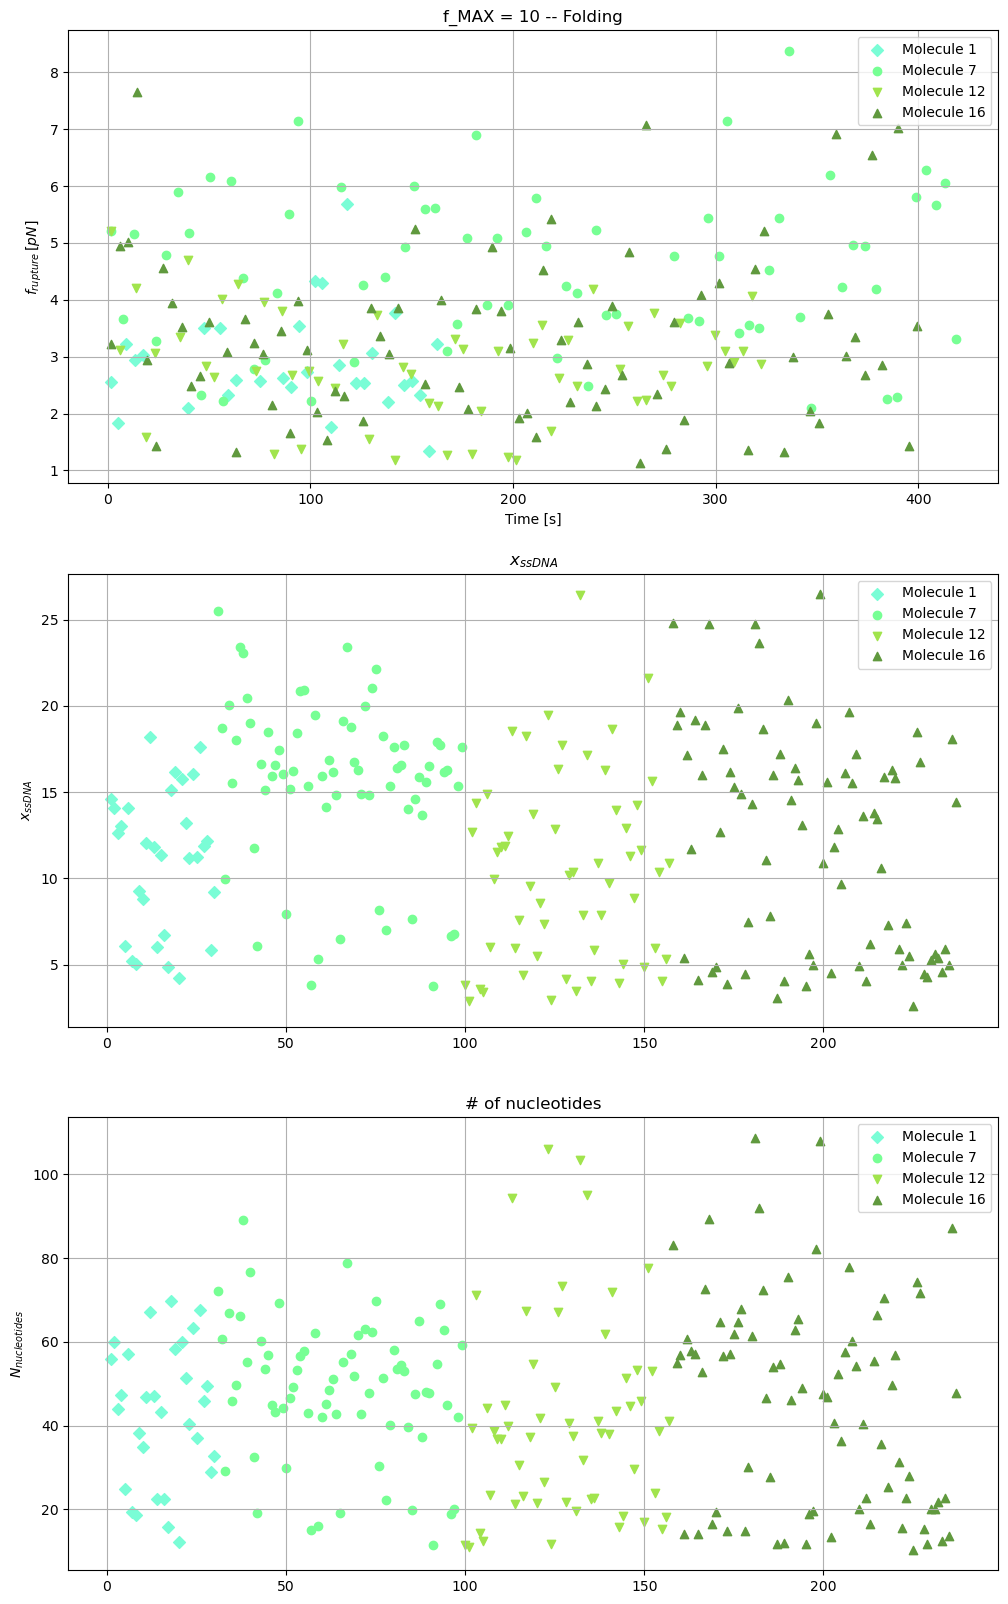

In [18]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_u[m])):
#         lab = f'Molecule {molecules[m]}' if i == 0 else ''
#         f, f_next, x_ss_DNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
#         plt.scatter(t_0, f, c=col, marker=markers[m], label=lab)
#     plt.grid()
#     plt.legend(loc='best')
#     plt.title(f'f_MAX = {f_max} -- Unfolding')
#     plt.xlabel('Time [s]')
#     plt.ylabel('$f_{rupture} \\:[pN]$')
#     plt.show()

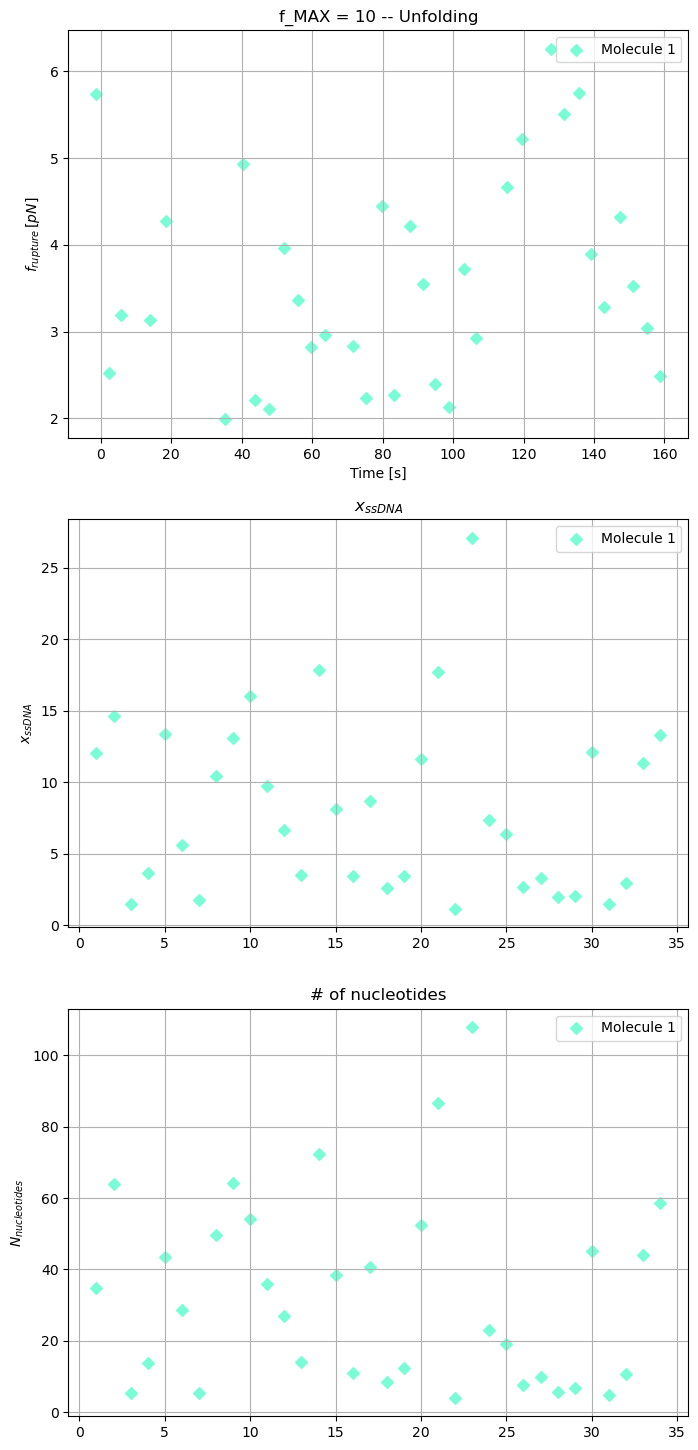

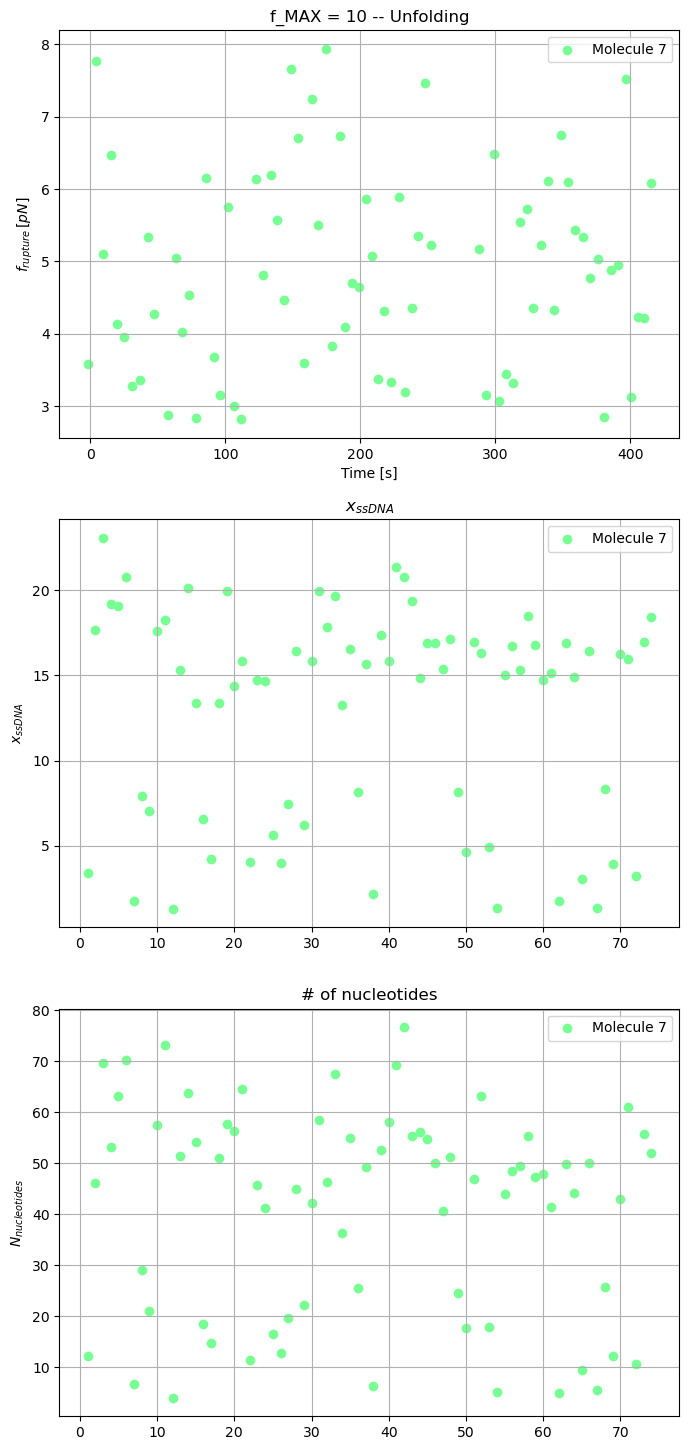

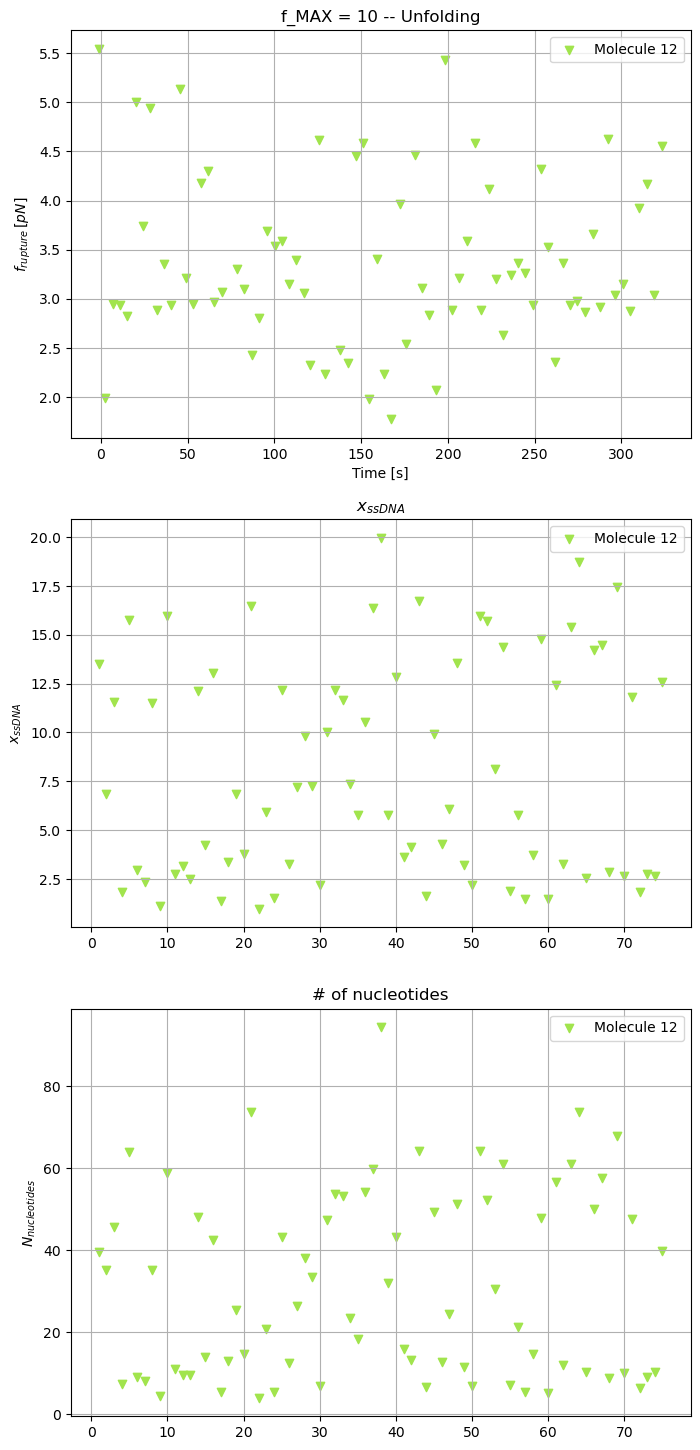

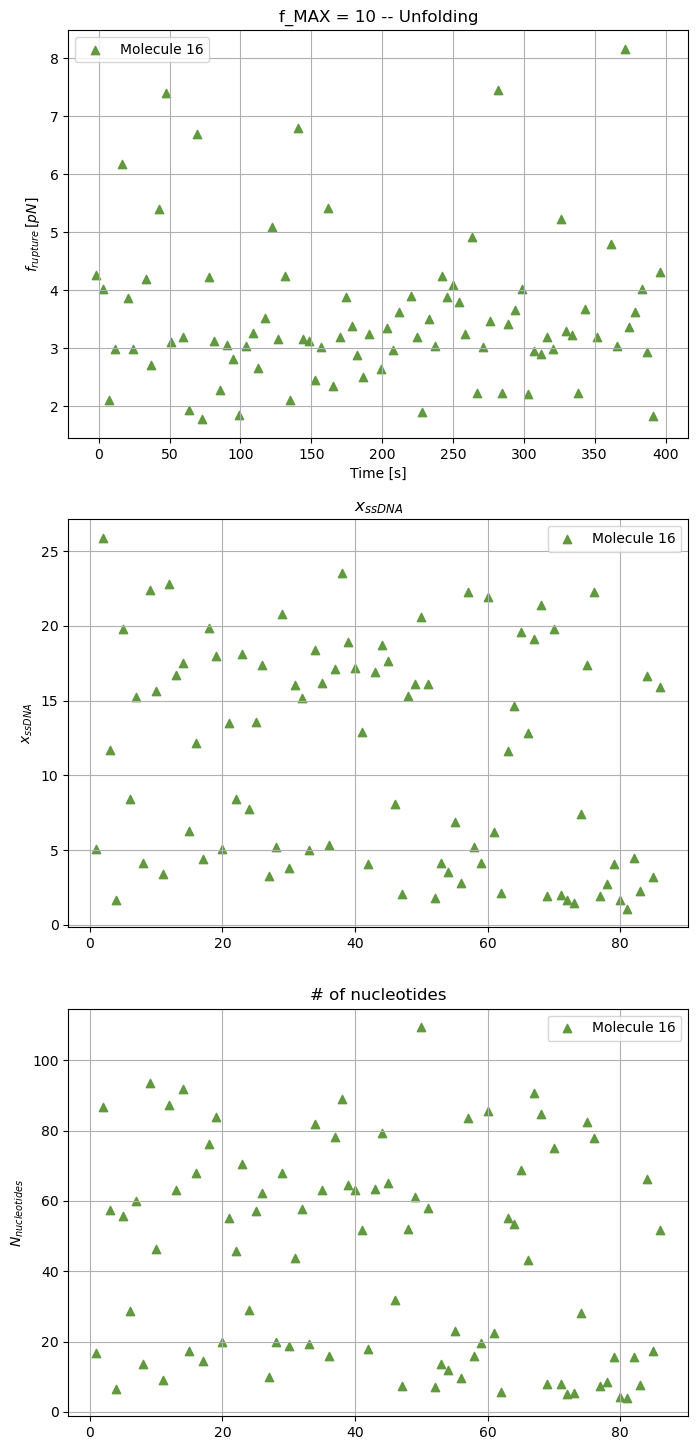

In [20]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()